### Student name: AMOS KIPKIRUI
### Student pace: Full time
### Scheduled project submission date/time: 25.4.2023

## Business understanding


### Problem statement
The objective of this project is to build a predictive model that will help identify customers that are likely to stop using SyriaTel company. We will try to answer the questions; are there any predictable patterns of the customers who are stopping the use of SyriaTel services? What are the features that might be significant in the customers who churn?

### Business context
SyriaTel is one of the top mobile network providers in Syria.The company offers services including calls, news, message, GSM and internet services. The induestry currently experiences stiff competition and therefore retaining customers is crucial for sustaining company's revenue growth. Doing customer churn analysis will help us identify features that are contributing to customer churn. This will enable the implementation of measures that will help reduce the customers stoppage from using company's services.
The stakeholder audience here include; Data analytics team, sales team, senior manaagement and the marketing executives.

### Objectives
Includes: 
1. To develop a machine learning model that can accurately predict customer churn based on historical customer data and behavioral patterns
2. To identify key features that significantly contribute to customer churn.This will enable for drawing of  insights into the underlying causes.
3. To Achieve a high level of accuracy and recall in the churn prediction model to minimize both false negatives (customers who churn but were not predicted) and false positives (customers predicted to churn but do not).
4. To Utilize the prediction model to come up with mitigation measures to help curb the customer churn problem.
5. To come up with recommendations to the company on how to retain their customers as this will help maintain the company's market share.

## Data understanding

### Import necessary libraries

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")


### load data

In [222]:
df = pd.read_csv('bigml_59c28831336c6604c800002a (1).csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Check for shape

In [223]:
df.shape

(3333, 21)

### Check for datatypes

In [224]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Some features like phone nummber and account length have less impact on customers churn. We will then term them as irrelevant.

In [225]:
df = df.drop(['phone number', 'account length'], axis=1)
df

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [226]:
numerical_columns = ['number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls',
                'total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls',
                'total intl charge','customer service calls']
categorical_columns = ['state','international plan','voice mail plan','area code']

### Check for missing values

In [227]:
df.isna().sum()

state                     0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Look at descriptive statistics

In [228]:
df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Check for duplicates

In [229]:
df.duplicated().sum()

0

There are no duplicated values.

### Exploratory data analysis 

Unique values in the dataset

In [230]:
df.nunique()

state                       51
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

We can see that there are four categorical features, lets analyze them. State has a lot of values which makes it hard to visualize.

415    1655
510     840
408     838
Name: area code, dtype: int64


<AxesSubplot:xlabel='area code', ylabel='count'>

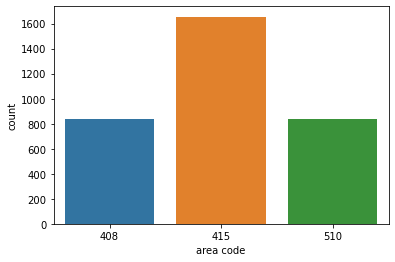

In [231]:
print(df['area code'].value_counts())
sns.countplot(data = df, x='area code')

From the above result, we can see that there are 1655 customers from area code 415. There are around a quarter of the total customers from area codes 510 and 408.

What is the relationship between area codes and customer churn 

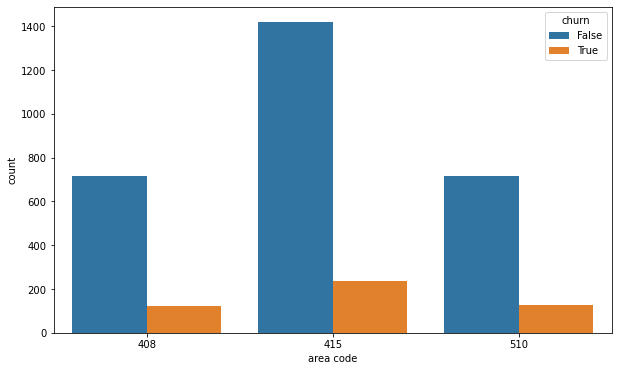

In [232]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='area code', hue='churn');

The combination of a higher churn rate and a larger customer base in the 415 area code should raise concerns for the company. It indicates that there may be specific factors or issues within this area code that contribute to a higher likelihood of churn. Customers from area codes 408 and 510 seems more satisfied with the services of the company.

Next, let us do analysis on international plan

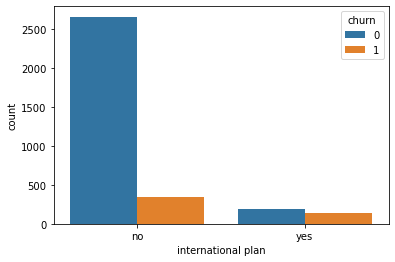

In [306]:

df['international plan'].value_counts()
sns.countplot(data=df, x='international plan', hue='churn');

Customers without an international plan have a higher churn rate compared to those with an international plan. The bar representing customers without an international plan is noticeably higher, indicating a larger proportion of churned customers in this group.

This suggests that having an international plan may contribute to higher customer loyalty or retention. Customers with an international plan may find value in the services or benefits provided, leading to a lower likelihood of churning.

Analysis on voice mail plan relationship with churn

In [234]:
df['voice mail plan'].value_counts()


no     2411
yes     922
Name: voice mail plan, dtype: int64

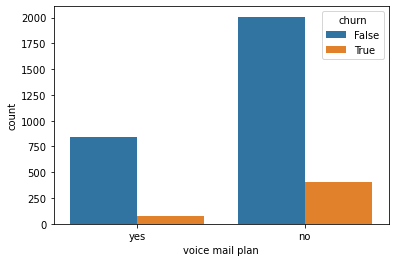

In [235]:
sns.countplot(data = df, x='voice mail plan', hue='churn');

From the above analysis, we can see that a lot of customers are not subscribed to voice mail plan. 
Customers without a voice mail plan have a higher churn rate compared to those with a voice mail plan. The bar representing customers without a voice mail plan is noticeably higher, indicating a larger proportion of churned customers in this group.

This suggests that the presence or absence of a voice mail plan can be a contributing factor to customer churn. Customers without a voice mail plan may perceive less value in the service or may have alternative communication preferences, leading to a higher likelihood of churning.

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
TX     72
UT     72
Name: state, dtype: int64


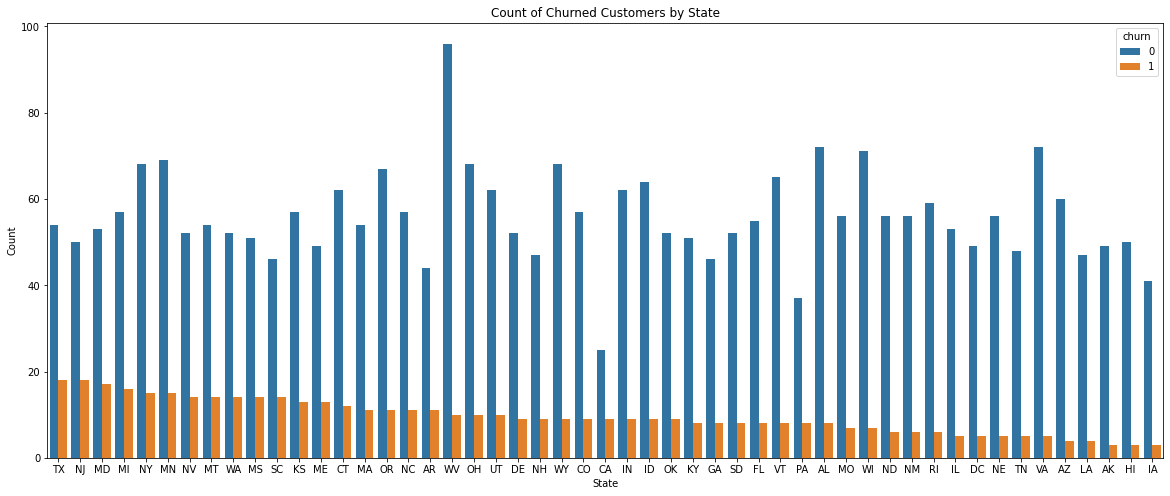

In [304]:
print(df['state'].value_counts().head(15))
plt.figure(figsize=(20, 8))
state_counts = df[df['churn'] == 1]['state'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='state', hue='churn', order=state_counts.index)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Churned Customers by State')
plt.show()

MD, TX, NJ. MI and NY have the highest number of churned customers. These states stand out with significantly higher bar heights compared to other states.

Relationship of churn with charges that the customers are subjected for the services they are given.

Churn versus total eve charge

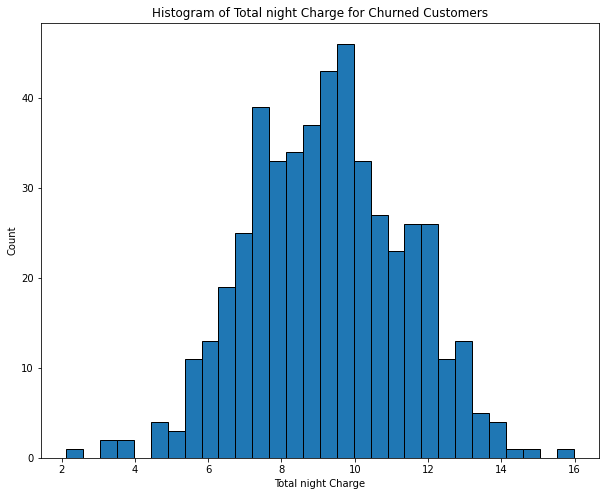

In [296]:
import matplotlib.pyplot as plt

churned_df = df[df['churn'] == 1]
plt.figure(figsize=(10, 8))
plt.hist(churned_df['total night charge'], bins=30, edgecolor='black')
plt.xlabel('Total night Charge')
plt.ylabel('Count')
plt.title('Histogram of Total night Charge for Churned Customers')
plt.show()

 The histogram is normally distributed, it implies that the charges during the night for churned customers follow a predictable pattern. This predictability can be valuable in understanding customer behavior and making informed decisions.

Customer service calls relationship with churn

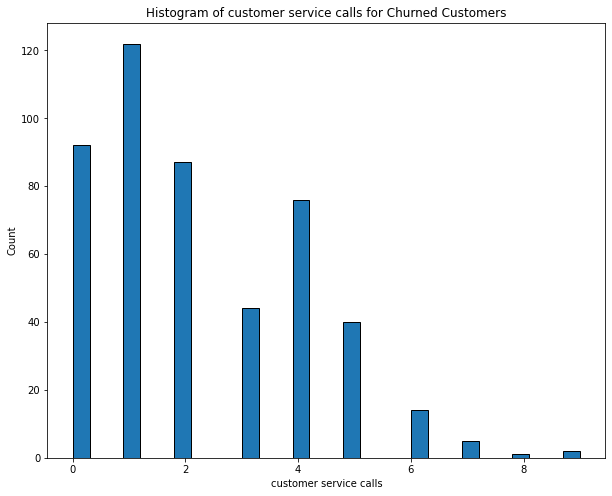

In [299]:
import matplotlib.pyplot as plt

churned_df = df[df['churn'] == 1]
plt.figure(figsize=(10, 8))
plt.hist(churned_df['customer service calls'], bins=30, edgecolor='black')
plt.xlabel('customer service calls')
plt.ylabel('Count')
plt.title('Histogram of customer service calls for Churned Customers')
plt.show()

Most churned customers have made a relatively low number of customer service calls. The majority of the bars in the histogram are concentrated towards the lower end of the x-axis, indicating that a significant portion of churned customers had fewer interactions with customer service.

Relationship between total intl calls with churn

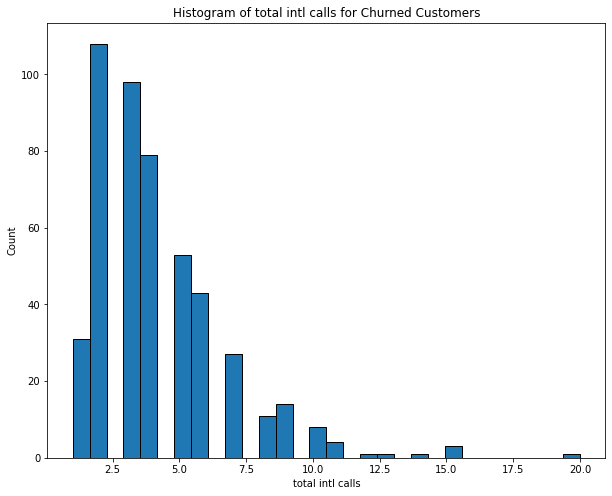

In [302]:
churned_df = df[df['churn'] == 1]
plt.figure(figsize=(10, 8))
plt.hist(churned_df['total intl calls'], bins=30, edgecolor='black')
plt.xlabel('total intl calls')
plt.ylabel('Count')
plt.title('Histogram of total intl calls for Churned Customers')
plt.show()

The majority of churned customers made a relatively low number of international calls. The histogram bars are concentrated towards the left side of the x-axis, indicating that most churned customers had minimal international call activity.
The peak of the histogram appears to be around 2-4 international calls. This indicates that the majority of churned customers had either minimal international call activity or made a few calls before deciding to churn.
The number of international calls does not seem to be a significant contributing factor to customer churn. Most churned customers had minimal international call activity, and even those who made a higher number of calls represent a smaller portion of the overall churned customer population. 

Relationship of total eve charges with churn

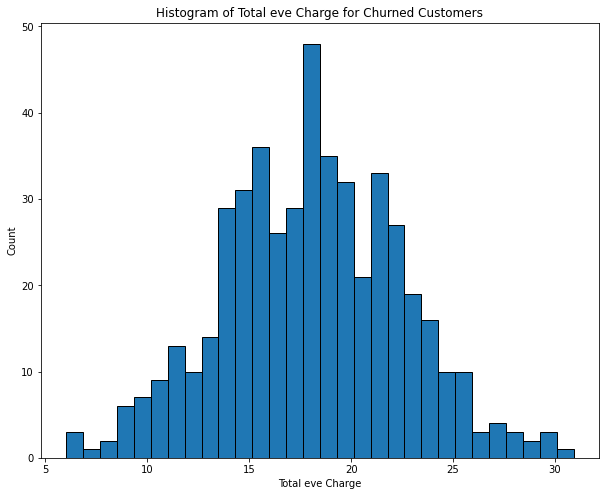

In [303]:
churned_df = df[df['churn'] == 1]
plt.figure(figsize=(10, 8))
plt.hist(churned_df['total eve charge'], bins=30, edgecolor='black')
plt.xlabel('Total eve Charge')
plt.ylabel('Count')
plt.title('Histogram of Total eve Charge for Churned Customers')
plt.show()

The distribution of total evening charges for churned customers appears to be approximately normal. The histogram follows a bell-shaped curve, indicating a relatively balanced distribution of charges.

The majority of churned customers had total evening charges in the range of approximately $10 to $20. The histogram bars are highest in this range, suggesting that a significant number of churned customers had evening charges within this range.

There is a noticeable decrease in the count of churned customers as the total evening charges increase beyond $20. The bars gradually decrease in height, indicating that fewer churned customers had higher evening charges.

The peak of the histogram appears to be around $15, indicating that a significant number of churned customers had total evening charges close to this value.

Look at the target variable and visualize

In [237]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

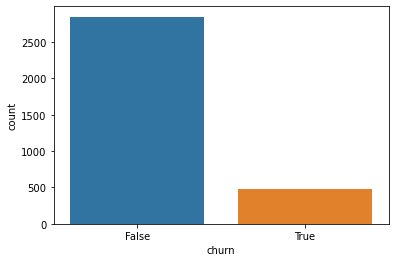

In [238]:
sns.countplot(data = df, x='churn');

There are a lot of customers who did not churn.

We can see from above that the target variable has a class imbalance problem. This has to be dealt wth to avoid rendering our model poor.

Let's change the values of churn column to numeric values. False will take 0 and true will take 1.

In [239]:
df['churn'] = df['churn'].map({False : 0, True : 1}).astype('int')
df

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [240]:
df.dtypes

state                      object
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

### Next, look at the correlation between features

In [241]:
correlation_matrix = df.corr()

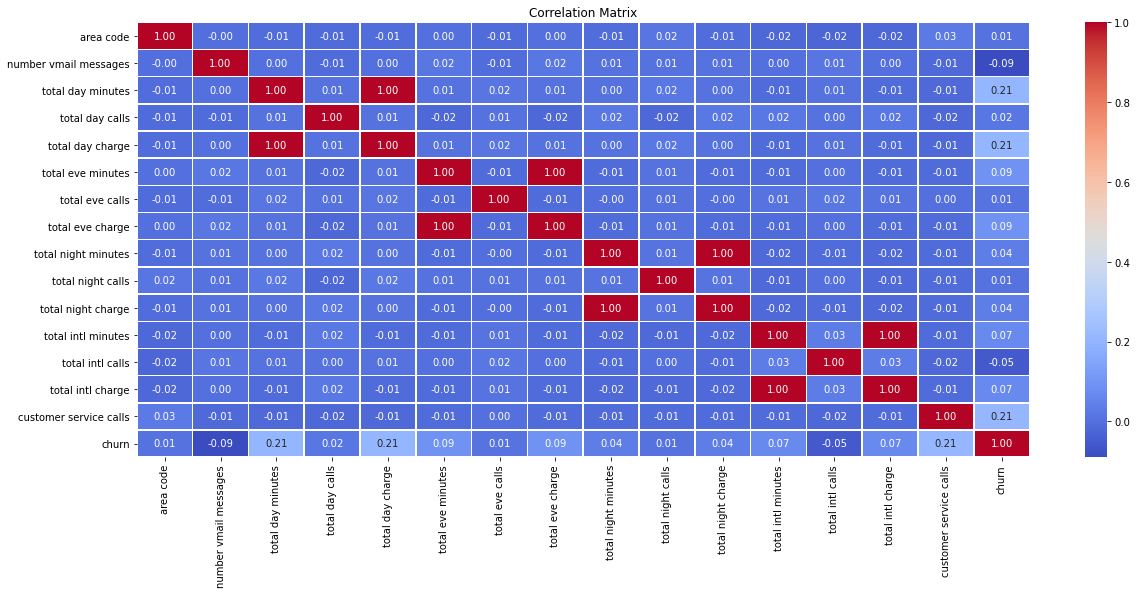

In [242]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that there are some features that are perfectly correlated like; 
1. total today charge and total today minutes 
2. total eve charge and total eve minutes 
3. total night charge and total night minutes 
4. total intl minutes and total intl charge 

The perfect correlation in this perspective is expected because the number of minutes that a customer gets is directly related to the  amount that is spent when buying those minutes. You buy the minutes.

###  Outlier treatment

From the above boxplots, we can see that there are alot of outliers. We will then treat/ remove some of the outliers.

In [243]:
cols = ['number vmail messages','total day calls','total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls',
                'total intl charge','customer service calls']

Function to remove outliers

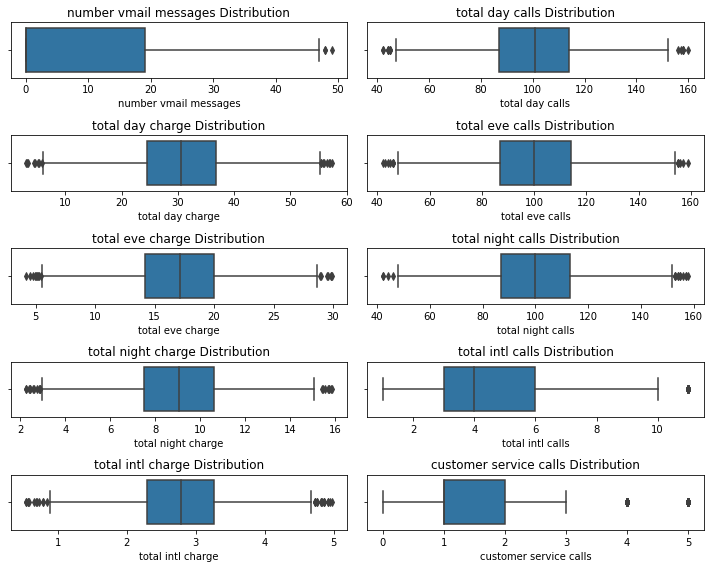

In [244]:


def remove_outliers(df, columns, threshold=3):
    
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
        outliers = df_cleaned.loc[abs(z_scores) > threshold]  # Find outliers based on threshold
        df_cleaned = df_cleaned.drop(outliers.index)  # Remove outliers from the DataFrame
    
    return df_cleaned


# Specify the columns to remove outliers from
columns_to_remove_outliers = cols

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(len(columns_to_remove_outliers)//2 + len(columns_to_remove_outliers)%2, 2, i+1)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()


In [245]:
df_cleaned.shape

(3176, 19)

In [246]:
df_cleaned

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Let us remove highly correlated features; we are working on df_cleaned dataset not df

In [247]:

def remove_highly_correlated_features(data, threshold=0.9):
  
    # Calculate the correlation matrix and take the absolute value
    corr_matrix = data.corr().abs()
    
    # Create a True/False mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    
    # List column names of highly correlated features (r > threshold)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    
    # Drop the highly correlated features from the DataFrame
    df_cleaned2 = data.drop(to_drop, axis=1)
    
    return df_cleaned2

# Specify the DataFrame with the features
data = pd.DataFrame(df_cleaned) 

# Remove highly correlated features
df_cleaned2 = remove_highly_correlated_features(data, threshold=0.9)

# Print the cleaned DataFrame
df_cleaned2


,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


### Define predictors and the target variables that is; X and Y variables

In [248]:
# Separate features and target
X = df_cleaned2.drop('churn', axis=1)
y = df_cleaned2['churn']

### Perform one-hot encoding for categorical features

In [249]:
categorical_features = ['state', 'international plan', 'voice mail plan', 'area code']
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_features])
# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=ohe.get_feature_names(categorical_features))


### Perform min-max scaling for numeric features

In [250]:
numeric_features = ['number vmail messages','total day calls','total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls',
                'total intl charge','customer service calls']
scaler = MinMaxScaler()
X_numeric_scaled = scaler.fit_transform(X[numeric_features])

# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

In [251]:
# Concatenate the encoded categorical features and scaled numeric features
X_encoded_scaled = pd.concat([X_categorical_encoded_df, X_numeric_scaled_df], axis=1)
X_encoded_scaled

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,0.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,0.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,0.4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.734694,0.296610,0.433327,0.717949,0.549981,0.353448,0.757531,0.5,0.480813,0.4
3172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.127119,0.667648,0.111111,0.344613,0.698276,0.467303,0.3,0.462754,0.6
3173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.567797,0.510392,0.136752,0.792299,0.422414,0.469508,0.5,0.738149,0.4
3174,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.533898,0.613574,0.358974,0.365228,0.818966,0.294636,0.9,0.182844,0.4


###  Performing a Train_test_split on the data

In [252]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=1)

#### Since our data was having class imbalance problem, we will then treat the problem using SMOTE technique

In [253]:
# Apply SMOTE for oversampling 
sm = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


##  Modeling

Having prepared our data, it is now ready to be trained and subjected to testing. We will have a baseline model and other simple models as well as a complex one.

### Baseline model; Logistic regression algorithm

In [254]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on training data
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Calculate accuracy score, precision, recall and F1_score
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy test:', accuracy_test)
precision = precision_score(y_test, y_test_pred)
print('Precision:', precision)
recall = recall_score(y_test, y_test_pred)
print('Recall:', recall)
f1_score = f1_score(y_test, y_test_pred)
print('F1 score:', f1_score)

Accuracy train: 0.799546485260771
Accuracy test: 0.7657232704402516
Precision: 0.4
Recall: 0.7339449541284404
F1 score: 0.5177993527508091


In [255]:
# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)

# Compute the log loss
logloss = log_loss(y_test, y_pred_proba)

print('Log Loss:', logloss)

Log Loss: 0.5118854319228369


Plot the confusion matrix of the above model

In [256]:
conf_matrix1 = confusion_matrix(y_test, y_test_pred)
conf_matrix1

array([[407, 120],
       [ 29,  80]], dtype=int64)

Next is to find out the features that had significant impact on the target variable in the above model.

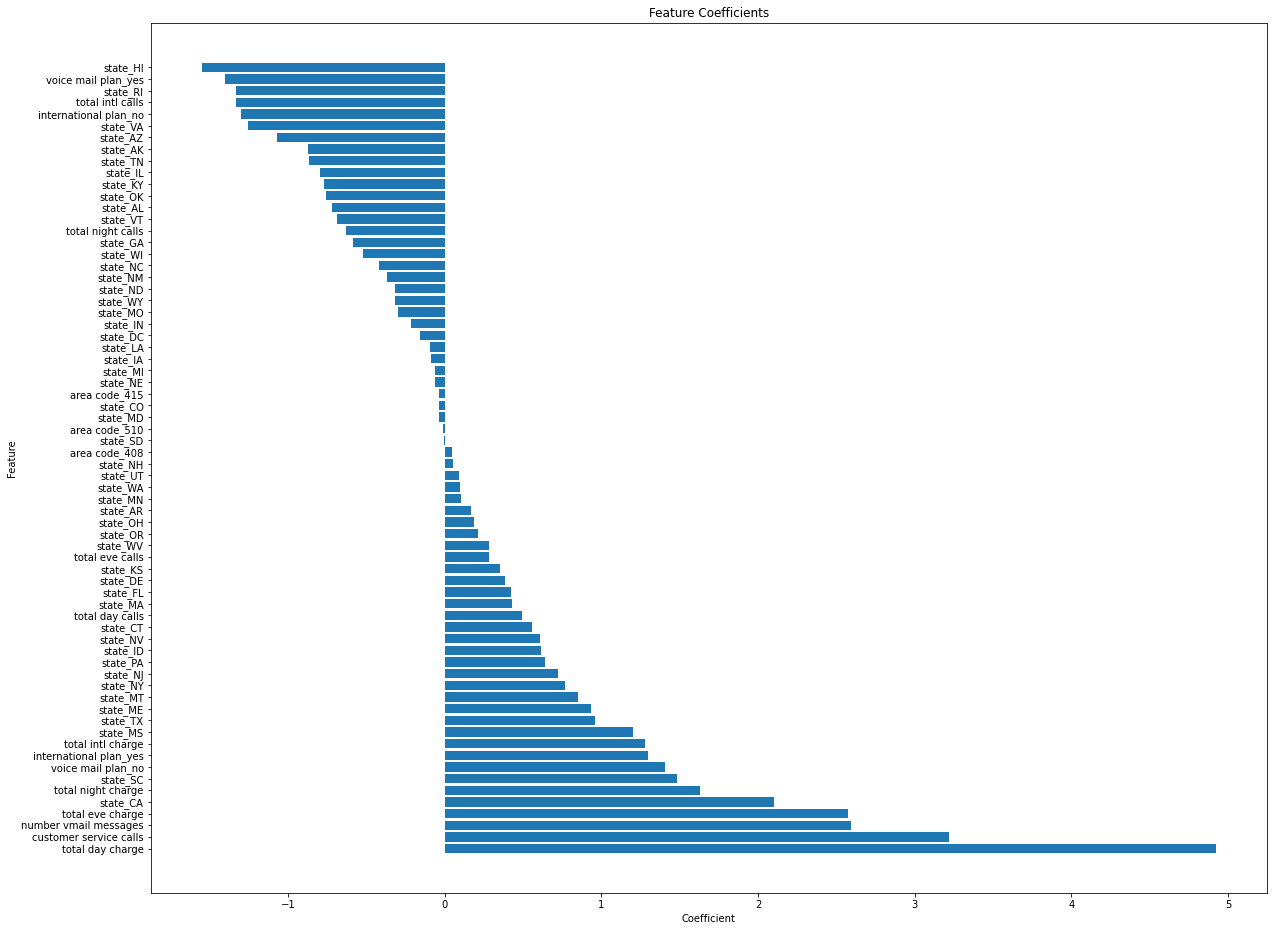

In [257]:
# Get feature coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train_resampled.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values('Coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(20, 16))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

From the above important features graph, we can see that total day charge had the most significant impact on the target variable followed by customer service calls and then in the third most significant feature is the total eve charge. We also see that state_HI has the most -ve relationship with the target variable; at state_HI, the likelihood of churn increases, followed by voice mail plan_yes. When the customer has the voice mail plan yes, the likelihood of the customer churning, increases.

### Second model; Decision Tree Classifier

In [258]:
model2 = DecisionTreeClassifier(random_state=23)
model2.fit(X_train_resampled, y_train_resampled)

y_train_pred2 = model2.predict(X_train_resampled)
y_test_pred2 = model2.predict(X_test)

accuracy_train2 = accuracy_score(y_train_resampled, y_train_pred2)
print('Accuracy train:', accuracy_train2)
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
print('Accuracy test:', accuracy_test2)
precision2 = precision_score(y_test, y_test_pred2)
print('Precision:', precision2)
recall2 = recall_score(y_test, y_test_pred2)
print('Recall:', recall2)
#f1value2 = f1_score(y_test, y_test_pred2)
#print('F1 score:', f1value2)


Accuracy train: 1.0
Accuracy test: 0.8805031446540881
Precision: 0.627906976744186
Recall: 0.7431192660550459


In [259]:
# Make predictions on the test data
y_pred_proba2 = model2.predict_proba(X_test)

# Compute the log loss
logloss = log_loss(y_test, y_pred_proba2)

print('Log Loss:', logloss)

Log Loss: 4.127275166687441


From the accuracy results, we can see that the model is overfitting the training data. This is not ideal for making it our final model.

Plot the confusion matrix of the above model

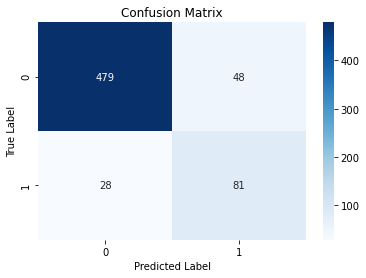

In [260]:
conf_matrix2 = confusion_matrix(y_test, y_test_pred2)
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

What are the important features in the Decision Tree Classifier?

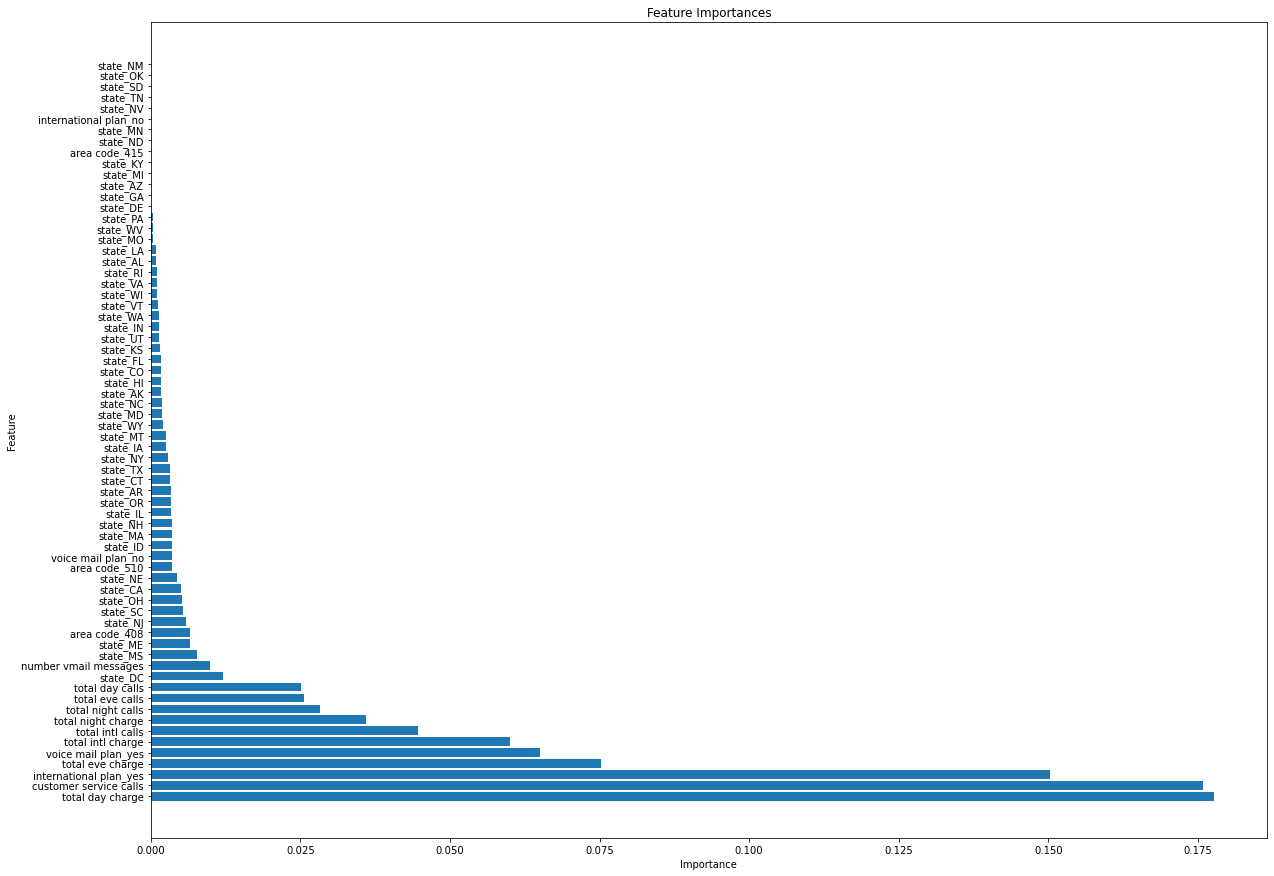

In [261]:
# Get feature importances
importances = model2.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(20, 15))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

From our above graph, we can see that total day charge, customer service calls, international plan_yes, total eve charge and voice mail plan_yes together with total intl charge have the most significant impact on the target variable.

### Third model

### Random Forest classifier

Accuracy (Train): 1.0
Accuracy (Test): 0.9166666666666666
Precision: 0.7692307692307693
Recall: 0.7339449541284404


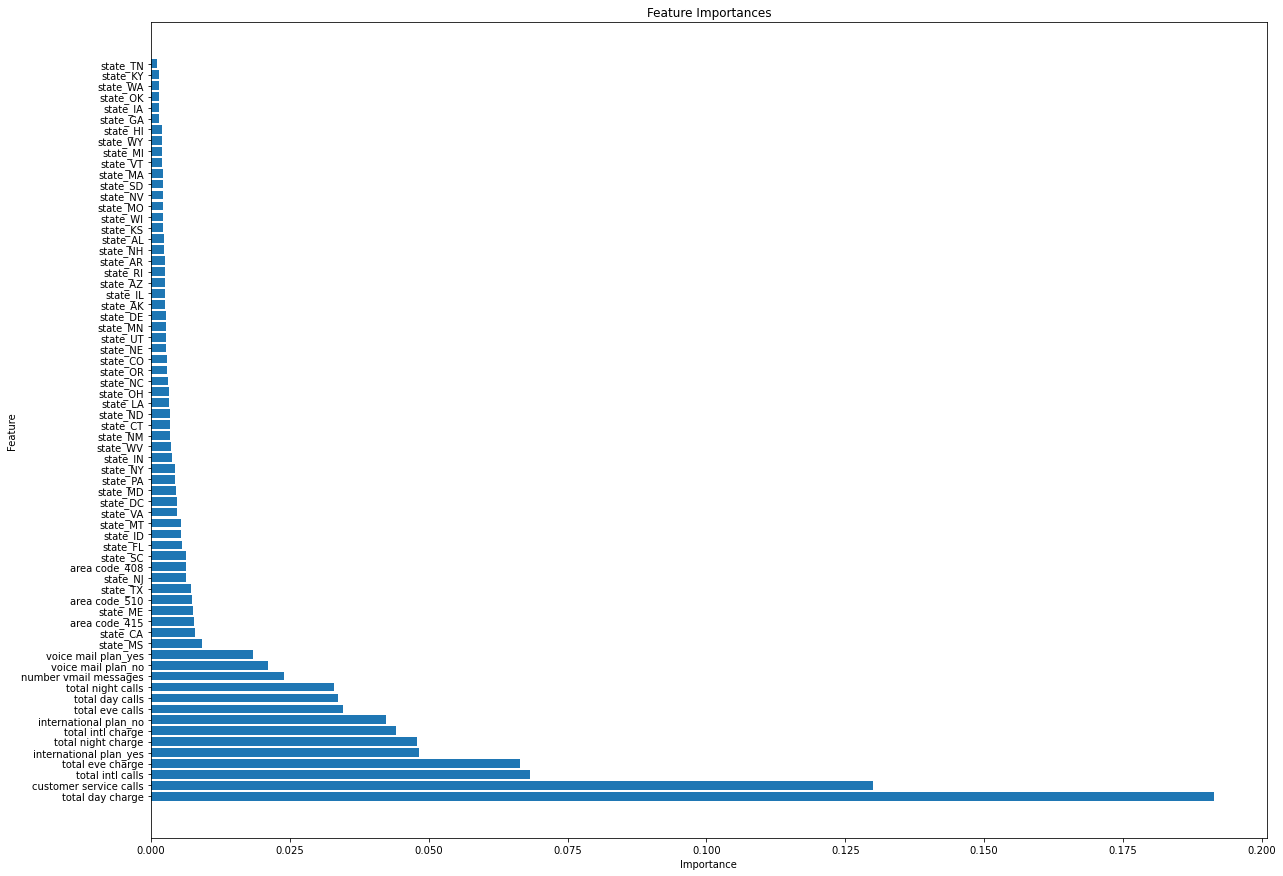

In [262]:
# Instantiate the Random Forest Classifier
model3 = RandomForestClassifier(random_state=24)

# Fit the model on the training data
model3.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and testing data
y_train_pred3 = model3.predict(X_train_resampled)
y_test_pred3 = model3.predict(X_test)

# Calculate evaluation metrics
accuracy_train3 = accuracy_score(y_train_resampled, y_train_pred3)
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
precision3 = precision_score(y_test, y_test_pred3)
recall3 = recall_score(y_test, y_test_pred3)
#f1 = f1_score(y_test, y_test_pred3)

# Print the evaluation metrics
print('Accuracy (Train):', accuracy_train3)
print('Accuracy (Test):', accuracy_test3)
print('Precision:', precision3)
print('Recall:', recall3)
#print('F1 Score:', f1)

# Get feature importances
importances = model3.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(20, 15))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

From the above model, we can see that the classifier is over fitting. This is not good for our model.

From the graph of important features, we can see that total day charge, customer service calls, total intl charge, international plan_yes and total night charge are the features with the most significant impact on the target variable; churn.

Let's calculate the Log loss of the above model

In [263]:
# Make predictions on the test data
y_pred_proba3 = model3.predict_proba(X_test)

# Compute the log loss
logloss3 = log_loss(y_test, y_pred_proba3)

print('Log Loss:', logloss3)

Log Loss: 0.269314101933419


Plot the confusion matrix for the above model

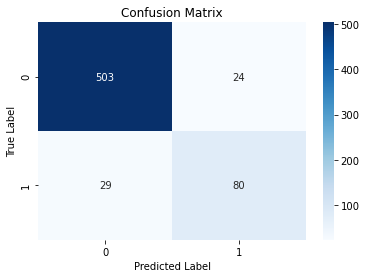

In [264]:
conf_matrix3 = confusion_matrix(y_test, y_test_pred3)
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Let's select the best model from the three models above. We use the ROC curve and also assess their accuracy to check on whether one is overfitting. We will consider the one with the best AUC and also does not overfit. We also need to consider log loss.

First we use ROC curve

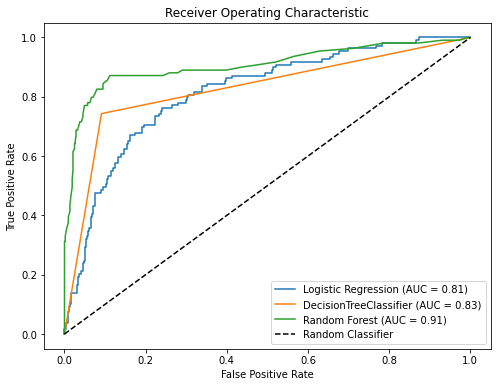

In [265]:
# Define the models
models = [model, model2, model3]  

# Define the model names for plotting
model_names = ['Logistic Regression','DecisionTreeClassifier', 'Random Forest']  

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the random classifier ROC curve (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

From the ROC curve, we can see that Random forest has a higher AUC as compared to the other two classifiers. We then compare their accuracies. 

Random forest has the best accuracy as compared to the other two.

Look at their log loss.

In [274]:
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

# Calculate log loss for each model
logloss_model1 = log_loss(y_test, y_pred_proba)
logloss_model2 = log_loss(y_test, y_pred_proba2)
logloss_model3 = log_loss(y_test, y_pred_proba3)


# Print the log losses
print('Log Loss - Model 1:', logloss_model1)
print('Log Loss - Model 2:', logloss_model2)
print('Log Loss - Model 3:', logloss_model3)

# Choose the model with the lowest log loss
best_model = None
lowest_logloss = float('inf')  # Initialize with a very high value

if logloss_model1 < lowest_logloss:
    best_model = model
    lowest_logloss = logloss_model1

if logloss_model2 < lowest_logloss:
    best_model = model2
    lowest_logloss = logloss_model2

if logloss_model3 < lowest_logloss:
    best_model = model3
    lowest_logloss = logloss_model3



print('Best Model:', best_model.__class__.__name__)

Log Loss - Model 1: 0.269314101933419
Log Loss - Model 2: 4.127275166687441
Log Loss - Model 3: 0.269314101933419
Best Model: RandomForestClassifier


From the above analysis, we see that Random forest classifier has the least Log loss. This is good for a model.

### From the evaluation practices above, we see that Random forest is performing best. We then have to tune the hyperparameters to try reduce any chances of overfitting. We will perform cross validation in this case.

In [266]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest Classifier
model = RandomForestClassifier(random_state=24)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Instantiate the Random Forest Classifier with the best hyperparameters
best_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                    max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    max_features=best_params['max_features'],
                                    random_state=24)

# Perform cross-validation
scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()

# Print the cross-validation results
print("Cross-Validation Accuracy:")
print(f"Mean: {mean_score:.4f}")
print(f"Standard Deviation: {std_score:.4f}")

# Fit the best model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and test data
y_train_pred_best = best_model.predict(X_train_resampled)
y_test_pred_best = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_train_best = accuracy_score(y_train_resampled, y_train_pred_best)
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)

# Print the accuracy results
print("Accuracy (Train):", accuracy_train_best)
print("Accuracy (Test):", accuracy_test_best)


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross-Validation Accuracy:
Mean: 0.9528
Standard Deviation: 0.0109
Accuracy (Train): 1.0
Accuracy (Test): 0.9182389937106918


The mean cross validation is 0.95 which is good for a model. However, we see that the model still overfits the training data. We then perform hyperparametr tuning on the logistic regression model to improve its accuracy

### Fourth model

### Perform hyperparameter tuning on the logistic regression model

In [267]:

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Use the best hyperparameters to create the final model
final_model = LogisticRegression(**best_params)

# Fit the final model on the training data
final_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and test data
y_train_pred4 = final_model.predict(X_train_resampled)
y_test_pred4 = final_model.predict(X_test)

# Calculate accuracy scores
accuracy_train4 = accuracy_score(y_train_resampled, y_train_pred4)
print('Accuracy train:', accuracy_train4)
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
print('Accuracy test:', accuracy_test4)
precision4 = precision_score(y_test, y_test_pred4)
print('Precision:', precision4)
recall4 = recall_score(y_test, y_test_pred4)
print('Recall:', recall4)
#f1_score4 = f1_score(y_test, y_test_pred4)
#print('F1 score:', f1_score4)


Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy train: 0.800453514739229
Accuracy test: 0.7688679245283019
Precision: 0.40594059405940597
Recall: 0.7522935779816514


Plot the confusion matrix for the above model

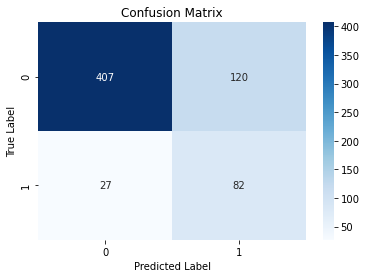

In [292]:
conf_matrix4 = confusion_matrix(y_test, y_test_pred4)
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Log loss

In [293]:
# Make predictions on the test data
y_pred_proba4 = final_model.predict_proba(X_test)

# Compute the log loss
logloss = log_loss(y_test, y_pred_proba4)

print('Log Loss:', logloss)

Log Loss: 0.5157730179924519


### Look at the important features in the above model

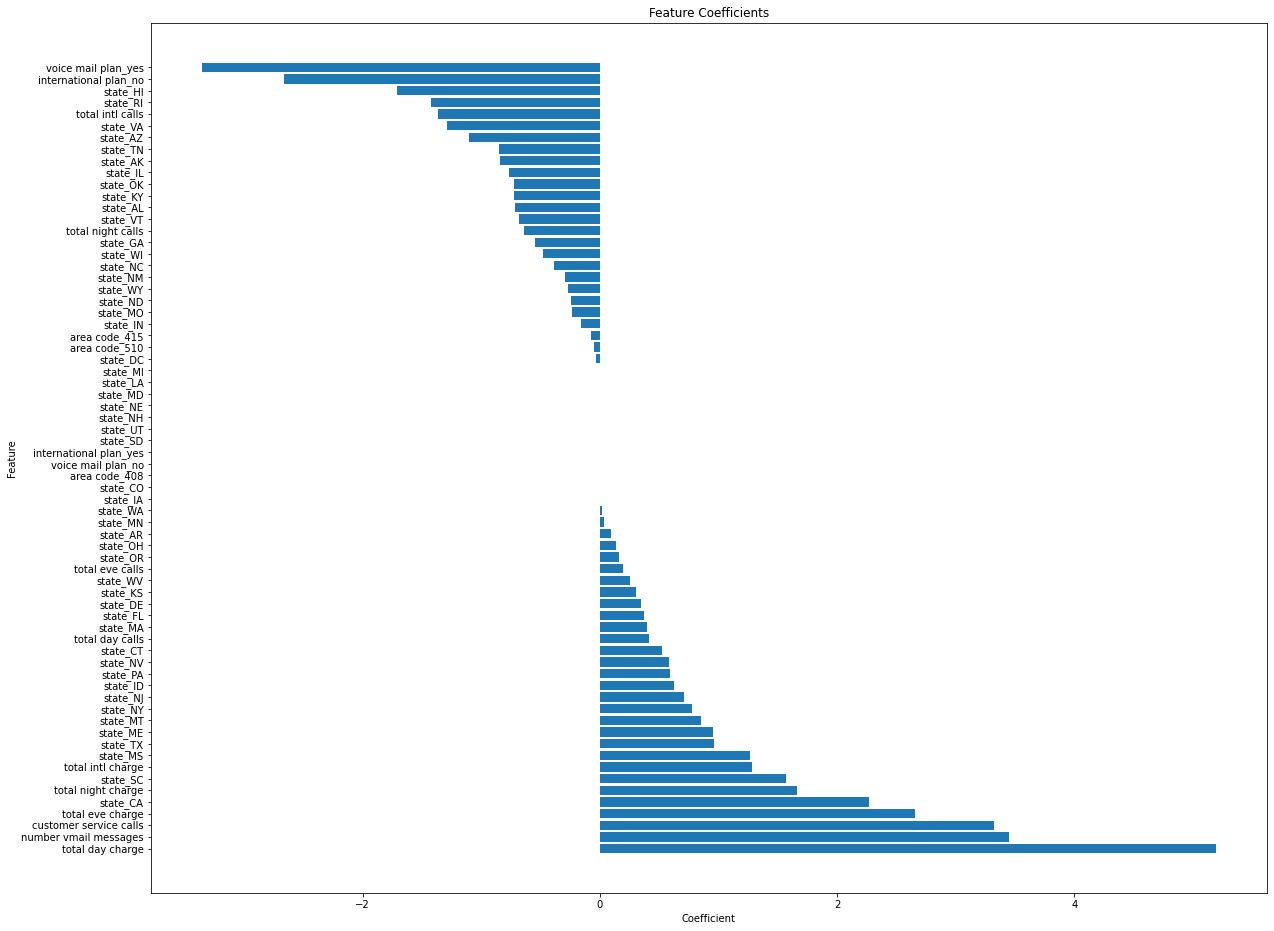

In [270]:
# Get feature coefficients
coefficients = final_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train_resampled.columns, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.sort_values('Coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(20, 16))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

The graph above shows tota charge, number of voice mail messages, customer service calls, total evening charge, state_CA to be among the top important features in this model.

We can see that the model is performing well, there is neither underfitting nor overfitting. The accuracy level is overally good.